      X     Y
0  0.10  0.60
1  0.15  0.71
2  0.08  0.90
3  0.16  0.85
4  0.20  0.30
5  0.25  0.50
6  0.24  0.10
7  0.30  0.20


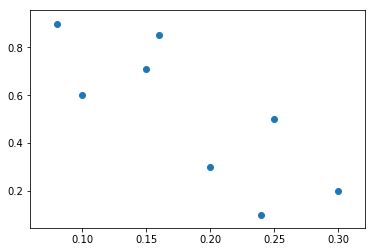

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

df  = pd.read_csv("assi4_data.csv")
print(df)
data = df.astype(float).values.tolist()
plt.scatter( dataset.iloc[:,0] ,dataset.iloc[:,1])
plt.show()


### Euclidean Distance

$$ 
\begin{aligned} d(\mathbf{p}, \mathbf{q})=\sqrt{\sum_{i=1}^{n}\left(q_{i}-p_{i}\right)^{2}} \end{aligned}
 $$


In [20]:
def euclideanDistance(instance1, instance2):
    distance = 0
    for x in range(len(instance1)):
        distance += pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(distance)

In [63]:
def kmeans(k,tolerance,iterations):
    
    #initialize the centroids, the first 'k' elements in the dataset will be our initial centroids
    centroids = []
    for i in range(k):
       centroids.append(dataset.iloc[i])
    #print(centroids)
    
    for i in range(iterations):
        classes = {}
        for i in range(k):
            classes[i] = []

        #find the distance between the point and cluster; choose the nearest centroid
        for features in data:
            distances = [ euclideanDistance(centroid,features) for centroid in centroids]
            classification = distances.index(min(distances))
            classes[classification].append(features)
            
        previous = list(centroids)
        
        #print(centroids)

        #average the cluster datapoints to re-calculate the centroids
        for classification in classes:
            #print(classification)
            centroids[classification] = np.average(classes[classification], axis = 0)   
            
        
        isOptimal = True
        
        
        for i in range(len(centroids)):

            original_centroid = previous[i]
            curr = centroids[i]

            if np.sum((curr - original_centroid)/original_centroid * 100.0) > tolerance:
                isOptimal = False

            #break out of the main loop if the results are optimal, ie. the centroids don't change their positions much(more than our tolerance)

        if isOptimal:
                return classes 

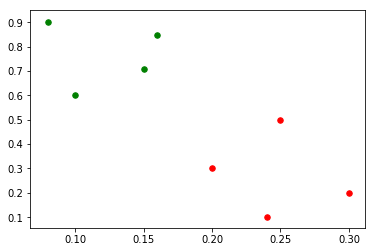

In [64]:
classes = kmeans(2,0.1,500)    

# print(classes)

colors = 10*["r", "g", "c", "b", "k"]

for classification in classes:
    color = colors[classification]
    for features in classes[classification]:
        plt.scatter(features[0], features[1], color = color,s = 30)